In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/language-detection/Language Detection.csv


In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/language-detection/Language Detection.csv")
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [4]:
print("List of all languages:")
for lang in df['Language'].unique(): 
    print(lang)
print("In the data frame there are", len(df['Language'].unique()), "in total.")

List of all languages:
English
Malayalam
Hindi
Tamil
Portugeese
French
Dutch
Spanish
Greek
Russian
Danish
Italian
Turkish
Sweedish
Arabic
German
Kannada
In the data frame there are 17 in total.


In [5]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [6]:
len1 = len(df)
df.drop(df[df.duplicated()].index, axis=0, inplace=True)
len2 = len(df)
print(len1 - len2, "row(s) have been dropped.")

66 row(s) have been dropped.


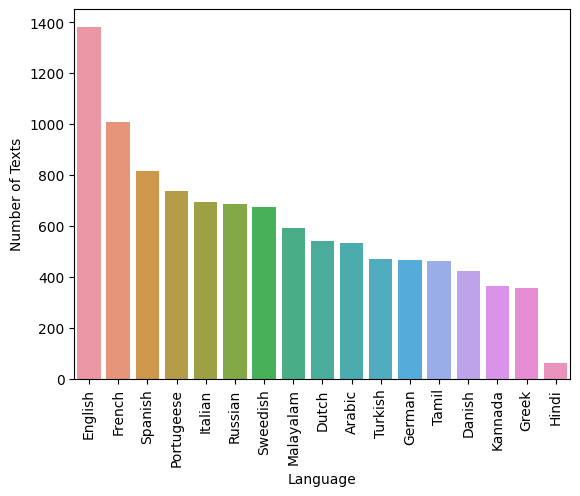

In [7]:
sns.barplot(x=df['Language'].value_counts().index, y=df['Language'].value_counts())
plt.xlabel('Language')
plt.ylabel('Number of Texts')
plt.xticks(rotation=90)
plt.show()

In [8]:
# Correction of a spelling error
df[df["Language"] == 'Sweedish'] = 'Swedish'

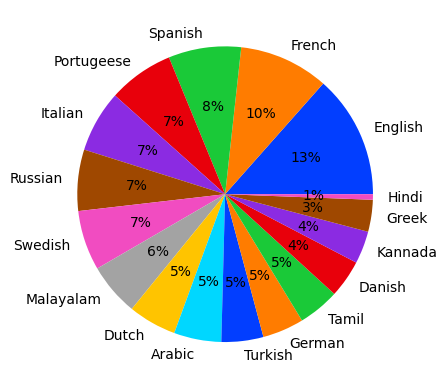

In [9]:
colors = sns.color_palette('bright')[0:len(df['Language'].unique())]

#create pie chart
plt.pie(df['Language'].value_counts(), labels = df['Language'].value_counts().index, colors = colors, autopct='%.0f%%')
plt.show()

In [10]:
# Text data preprocessing
df['Text'] = df['Text'].str.lower()
df['Text'] = df['Text'].str.replace(r'[\([{})\]!@#$,"%^*?:;~`0-9]', '', regex=True)
df['Text'] = df['Text'].str.strip()

In [11]:
# The TF-IDF vectorizer initializing 
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(df['Text'])
X_tfidf = tfidf_vectorizer.transform(df['Text'])

In [12]:
# Encoding the target labels (languages)
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(df['Language'])

In [13]:
# Data splitting
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, Y_encoded, test_size=0.2, random_state=42)

In [14]:
# the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [15]:
# A function to predict a randomly given text
def predict_language(input_text):
    preprocessed_text = input_text.lower()
    input_tfidf = tfidf_vectorizer.transform([preprocessed_text])
    predicted_language_encoded = random_forest.predict(input_tfidf)
    predicted_language = label_encoder.inverse_transform(predicted_language_encoded)
    return predicted_language[0]

In [16]:
# Text predictions: here and below
input_text = "Привет! Как дела? Чем сейчас занимаешься?"
predicted_language = predict_language(input_text)
print("Predicted Language:", predicted_language)
if predicted_language == 'Russian':
    print("Отлично!")

Predicted Language: Russian
Отлично!


In [17]:
# It must be French
input_text = "Salut, ça va? Qu'est-ce que tu fais maintenant?"
predicted_language = predict_language(input_text)
print("Predicted Language:", predicted_language)
if predicted_language == 'French':
    print("Parfait!")

Predicted Language: French
Parfait!


In [18]:
# Whereas this must be German
input_text = "Hallo, wie geht's dir? Was machst du gerade?"
predicted_language = predict_language(input_text)
print("Predicted Language:", predicted_language)
if predicted_language == 'German':
    print("Sehr gut!")

Predicted Language: German
Sehr gut!


**If you find this notebook useful, please consider up-voting. I would really appreciate it. Have a nice day!**